# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [79]:
import pandas as pd
dataset = pd.read_csv('Bank_cleaned.csv')

In [80]:
dataset.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,deposit
0,59,0,1,1,2288,1,0,1021,0,1
1,56,0,1,1,469,0,0,1283,0,1
2,41,9,1,1,1618,1,0,1246,0,1
3,55,7,1,1,2356,1,0,577,0,1
4,54,0,1,2,608,0,0,671,1,1


In [81]:
dataset.info

<bound method DataFrame.info of        age  job  marital  education  balance  housing  loan  duration  \
0       59    0        1          1     2288        1     0      1021   
1       56    0        1          1      469        0     0      1283   
2       41    9        1          1     1618        1     0      1246   
3       55    7        1          1     2356        1     0       577   
4       54    0        1          2      608        0     0       671   
...    ...  ...      ...        ...      ...      ...   ...       ...   
11157   33    1        2          0      425        1     0       255   
11158   39    7        1          1     1149        0     0        81   
11159   32    9        2          1      453        0     0       154   
11160   43    9        1          1      424        0     1         7   
11161   34    9        1          1      424        0     0       626   

       campaign  deposit  
0             0        1  
1             0        1  
2         

### Getting the inputs and output

In [82]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [83]:
X

array([[   0,    1,    1, ...,    0, 1021,    0],
       [   0,    1,    1, ...,    0, 1283,    0],
       [   9,    1,    1, ...,    0, 1246,    0],
       ...,
       [   9,    2,    1, ...,    0,  154,    1],
       [   9,    1,    1, ...,    1,    7,    1],
       [   9,    1,    1, ...,    0,  626,    0]])

In [84]:
y

array([1, 1, 1, ..., 0, 0, 0])

### Creating the Training Set and the Test Set

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
X_train

array([[  4,   1,   1, ...,   0, 283,   0],
       [  5,   0,   1, ...,   0, 259,   0],
       [  1,   1,   0, ...,   0, 970,   4],
       ...,
       [  4,   1,   1, ...,   0,  12,   7],
       [  0,   1,   1, ...,   0, 224,   0],
       [  5,   1,   0, ...,   0, 726,   0]])

In [87]:
X_test

array([[   7,    1,    1, ...,    0,  103,    0],
       [   9,    1,    1, ...,    1,  227,    0],
       [   7,    2,    1, ...,    1,  185,    1],
       ...,
       [  10,    1,    0, ...,    0, 1319,    1],
       [   0,    2,    1, ...,    0,   65,    0],
       [   7,    1,    1, ...,    0,  327,    1]])

In [88]:
y_train

array([0, 1, 1, ..., 0, 0, 1])

In [89]:
y_test

array([0, 1, 0, ..., 1, 1, 0])

### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [91]:
X_train

array([[-0.1373175 , -0.30765462, -0.29876622, ..., -0.39003722,
        -0.24626285, -0.57668854],
       [ 0.17650589, -1.90849849, -0.29876622, ..., -0.39003722,
        -0.32426133, -0.57668854],
       [-1.07878768, -0.30765462, -1.83279935, ..., -0.39003722,
         1.9864435 ,  0.9532088 ],
       ...,
       [-0.1373175 , -0.30765462, -0.29876622, ..., -0.39003722,
        -1.12699563,  2.10063181],
       [-1.39261107, -0.30765462, -0.29876622, ..., -0.39003722,
        -0.4380091 , -0.57668854],
       [ 0.17650589, -0.30765462, -1.83279935, ..., -0.39003722,
         1.193459  , -0.57668854]])

## Part 2 - Building and training the model

### Building the model

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [93]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [94]:
y_pred = model.predict(sc.transform(X_test))

In [95]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

Making the prediction of a single data point with:

1. Age = 21
2. Job = (1-11) = 10
3. Marital (1-3) = 2
4. Education (1-3)= 3
5. Balance = 3
6. Housing = 0
7. Loan = 0
8. Duration = 2000
9. Campaign = 2

In [96]:
model.predict(sc.transform([[10,2,3,0,0,1,2000,2]]))

array([1])

## Part 3: Evaluating the model 

### Confusion Matrix

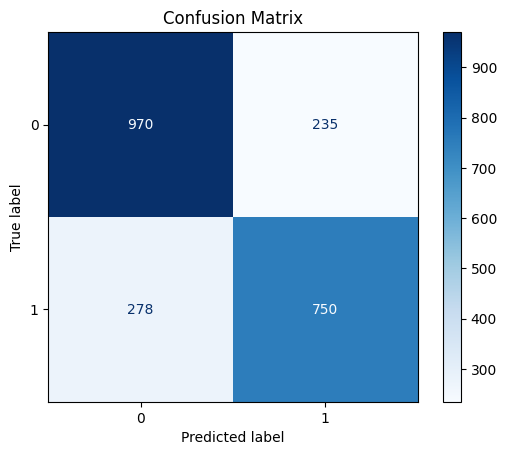

In [97]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Accuracy

In [98]:
(970+750)/(968+750+235+278)

0.7709547288211565

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7702642185400806